<a href="https://colab.research.google.com/github/ameerfayiz/ML-notebooks/blob/main/Stable_Diffusion_Fast_UpScaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/huggingface/diffusers.git -q
!pip install transformers accelerate scipy safetensors -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 86.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 113.4 MB/s eta 0:00:00


In [2]:
from diffusers import StableDiffusionLatentUpscalePipeline, StableDiffusionPipeline
import torch


In [3]:
#pipeline = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

pipeline = StableDiffusionPipeline.from_pretrained("wavymulder/Analog-Diffusion", torch_dtype=torch.float16)
pipeline.to("cuda")

safety_checker/model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.13.0.dev0",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [4]:
upscaler = StableDiffusionLatentUpscalePipeline.from_pretrained("stabilityai/sd-x2-latent-upscaler", torch_dtype=torch.float16)
upscaler.to("cuda")

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

StableDiffusionLatentUpscalePipeline {
  "_class_name": "StableDiffusionLatentUpscalePipeline",
  "_diffusers_version": "0.13.0.dev0",
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [31]:
import random
# prompt = "analog style close up photo portrait of a young chinese girl"
prompt = "analog style Photorealistic portrait of an alien, slick skin, large eyes, slime, subsurface scattering, alien starship in background, exquisite detail, ethereal light, intricate details, 8K, film grain, bokeh, depth of field, sharp focus, shot on Hasselblad, highly detailed, by greg rutkowski, global illumination, digital art, smog, pollution, toxic waste,3d render, octane render, volumetrics, by greg rutkowski"
negative_prompt = "child, childish, NSFW, text, signature, watermark, border, blur haze"
generator = torch.manual_seed(random.randint(0,9999999999))
low_res_latents = pipeline(prompt, generator=generator, output_type="latent", num_inference_steps = 30, guidance_scale = 7 , negative_prompt=negative_prompt).images
upscaled_image = upscaler(
    prompt=prompt,
    image=low_res_latents,
    num_inference_steps=30,
    guidance_scale=0,
    generator=generator,
).images[0]



The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['focus, shot on hasselblad, highly detailed, by greg rutkowski, global illumination, digital art, smog, pollution, toxic waste, 3 d render, octane render, volumetrics, by greg rutkowski']


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Low Res Image

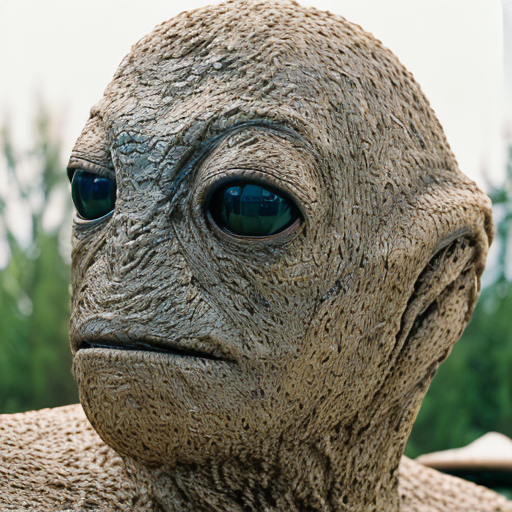

In [32]:
with torch.no_grad():
    image = pipeline.decode_latents(low_res_latents)
image = pipeline.numpy_to_pil(image)[0]

image.save("low_res_image.png")
from IPython.display import Image
Image("low_res_image.png")

HD Image

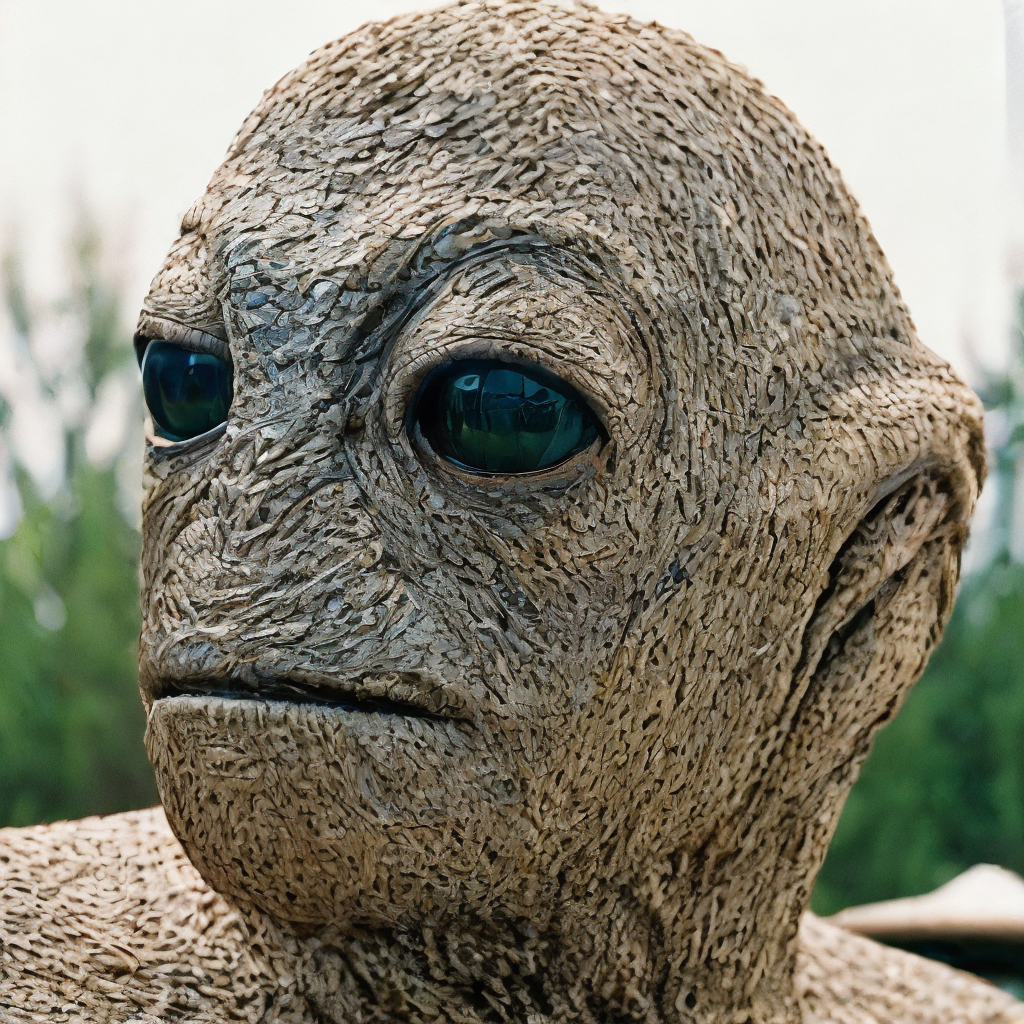

In [33]:
upscaled_image.save("high_res_1024.png")
from IPython.display import Image
Image("high_res_1024.png")